In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [ ]:
df = pd.read_csv("breast-cancer.csv")

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.drop('id', axis = 1, inplace = True)

In [ ]:
px.pie(df, 'diagnosis', color ='diagnosis')

In [ ]:
for column in df.drop('diagnosis',axis=1).columns[:5]:
  fig = px.box(df, x = 'diagnosis', y = column, color = 'diagnosis', orientation='v')
  fig.show()


diagnoza  
średnia_promienia  
średnia_tekstury  
średnia_obwodu  
średnia_powierzchni  
średnia_gładkości  
średnia_zwartości  
średnia_wklęsłości  
średnia_punktów_wklęsłych  
średnia_symetrii  
średnia_wymiaru_fraktalnego  
promień_se  
sekunda_tekstury  
sekunda_obwodu  
sekunda_obszaru  
gładkość_se  
zwartość_se  
sekunda_wklęsłości  
sekunda_se  
symetria_wymiar_fraktalny  
najgorszy_promień  
najgorsza_tekstura  
najgorszy_obwód  
najgorszy_obszar  
najgorsza_gładkość  
najgorsza_zwartość  
najgorsza_wklęsłość  
najgorsze_punkty_wklęsłe  
najgorsza_symetria  
najgorszy_wymiar_fraktalny  

In [ ]:
for column in df.drop('diagnosis', axis = 1).columns[5:10]:
  fig = px.scatter(df, x = column, color = 'diagnosis')
  fig.show()

## Checking Correlation with the target

In [ ]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

<Axes: >

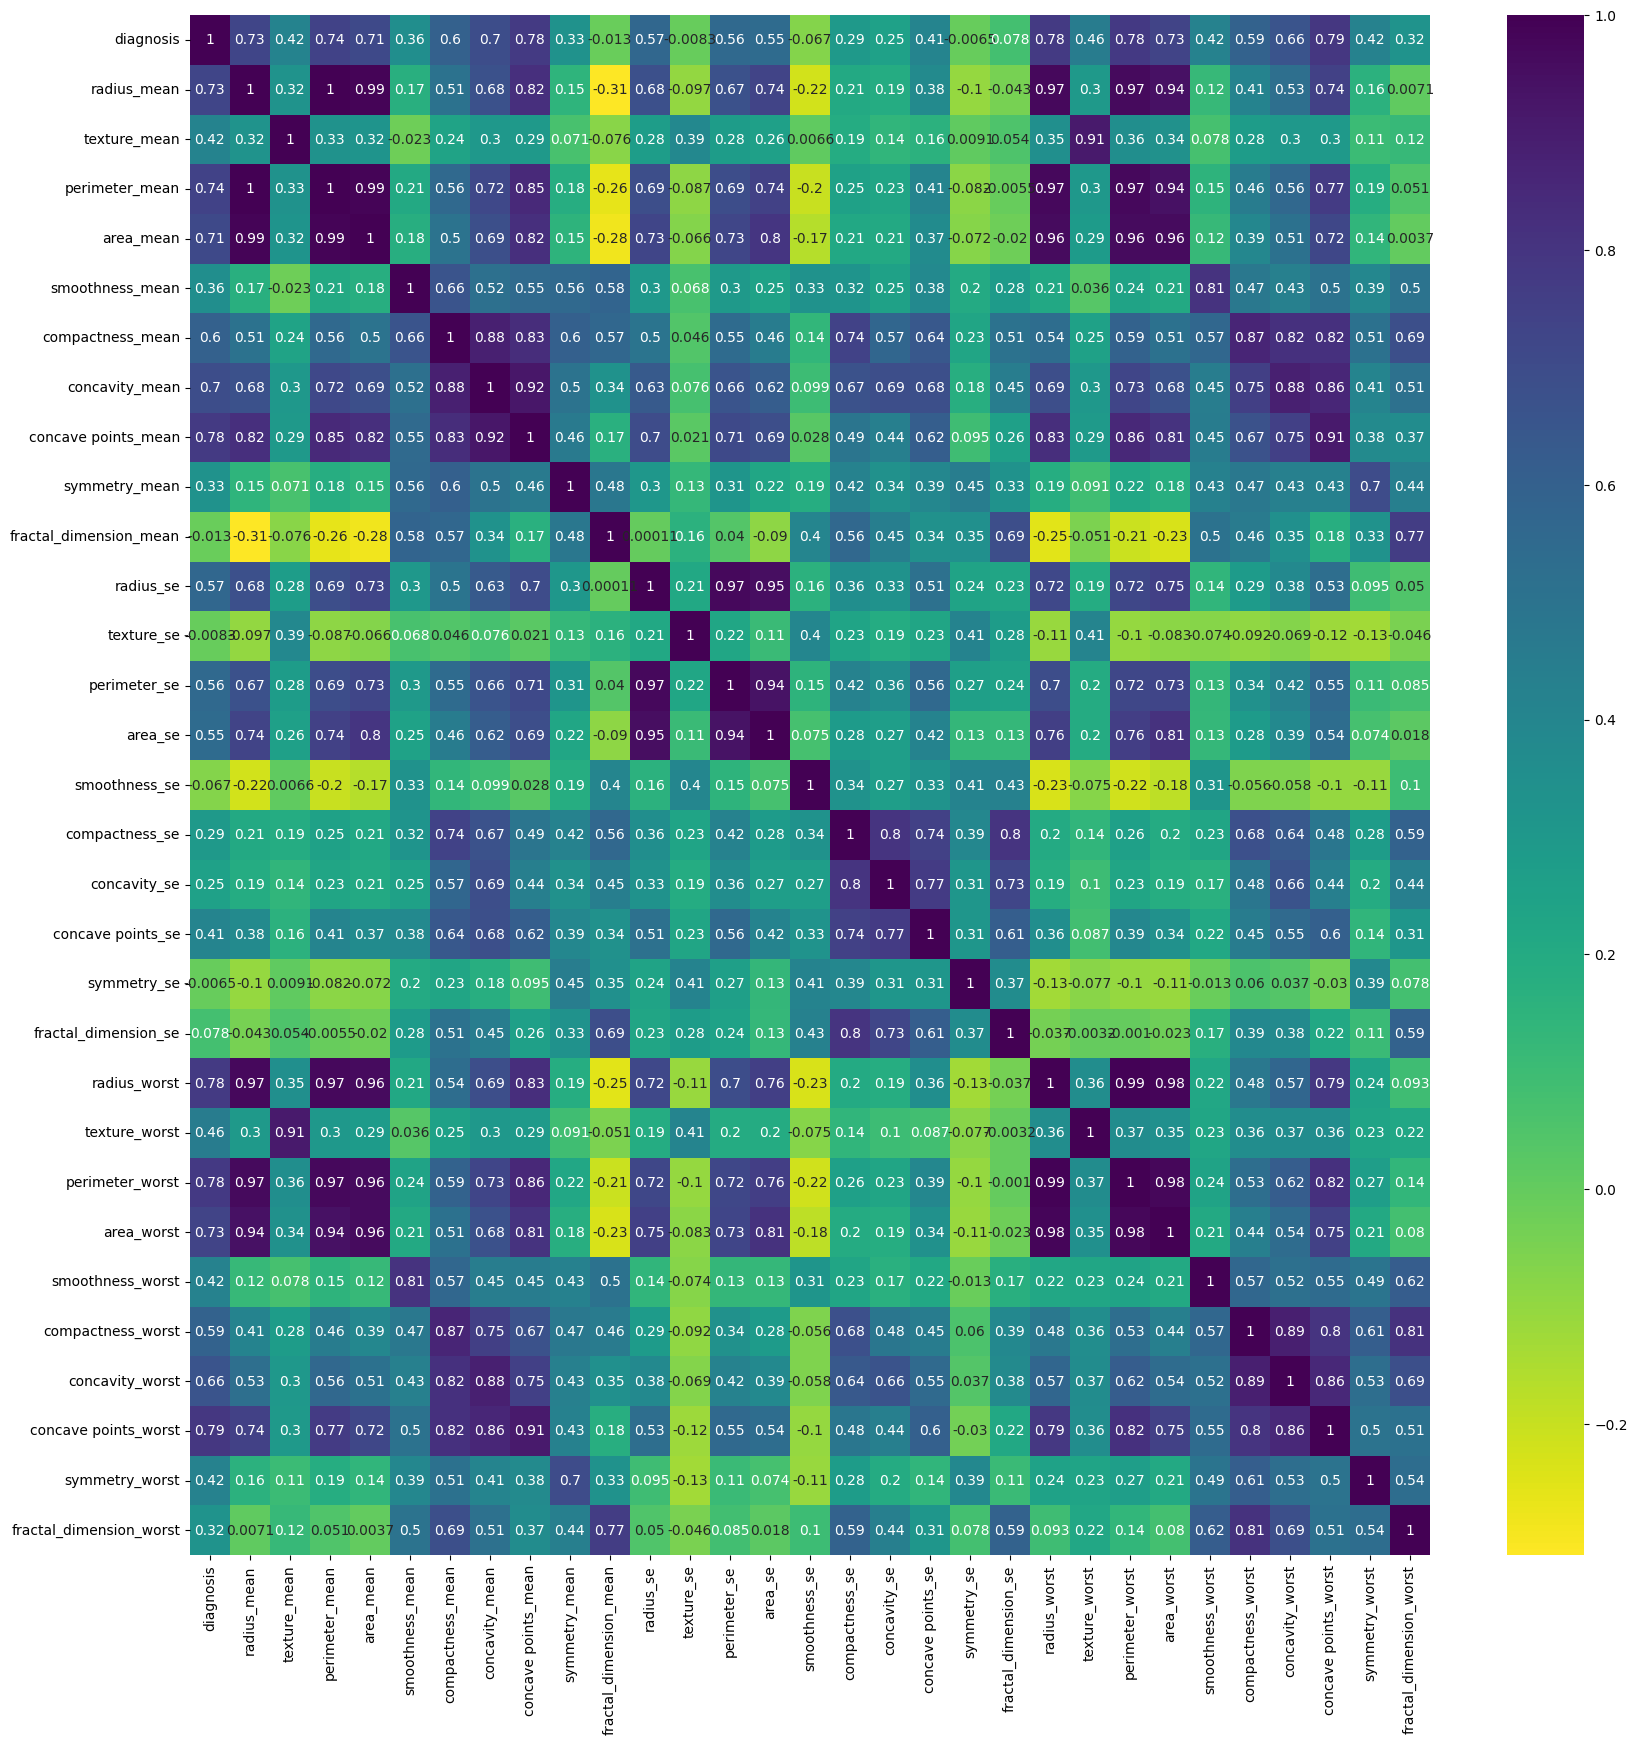

In [ ]:
corr = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr,cmap='viridis_r',annot=True)

Feature selection

In [ ]:
notincluded_columns = abs(corr['diagnosis'])[abs(corr['diagnosis'] < 0.25)]
notincluded_columns = notincluded_columns.index.tolist()
for col in notincluded_columns:
  df.drop(col, axis = 1, inplace = True)

In [ ]:
print(notincluded_columns)

['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']


In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  radius_se                569 non-null    float64
 11  perimeter_se             569 non-null    float64
 12  area_se                  569 non-null    float64
 13  compactness_se           569 non-null    float64
 14  concavity_se             5

In [ ]:
X_train = df.drop('diagnosis', axis = 1).values
y_train = df['diagnosis']
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)

Shape of X_train (569, 25)
Shape of y_train (569,)


In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train.shape

(569, 25)

In [ ]:
X_train

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

<a id="ModelImplementation"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Model Implementation</center></h1>



# How the algorithm works

**We'll start with all examples at the root node then:**

**We'll calculate information gain for splitting on all possible features and pick the one with the highest value**

**Then we'll split the data according to the selected feature**

**We'll repeat this  process until stopping criteria is met**

## Key Points:

### Entropy
**Entropy function which is a way to measure impurity**

**Entropy is represented by this function**
$$H = -\sum\limits_{}^{} p_{i}\text{log}_2 p_{i}
$$

**Where $(p_1)$ is the fraction of examples that are a certain class**


### Information Gain

**Information gain is the reduction in entropy when he make a split**

**Recall that our goal is to choose the split that gives the highest information gain, information gain equation =**

**$$H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$**
**where**
- $H(p_1^\text{node})$ is entropy at the node
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies at the left and the right branches resulting from the split
- $w^{\text{left}}$ and $w^{\text{right}}$ are the proportion of examples at the left and right branch respectively



In [ ]:
class Node():
    """
    A class representing a node in a decision tree.
    """

    def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None):
        """
        Initializes a new instance of the Node class.

        Args:
            feature: The feature used for splitting at this node. Defaults to None.
            threshold: The threshold used for splitting at this node. Defaults to None.
            left: The left child node. Defaults to None.
            right: The right child node. Defaults to None.
            gain: The gain of the split. Defaults to None.
            value: If this node is a leaf node, this attribute represents the predicted value
                for the target variable. Defaults to None.
        """
        self.feature = feature
        self.threshold = treshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value

DecisionTree class


In [ ]:
class DecisionTree():
    def __init__(self, min_samples=2, max_depth=2):
        """
        Constructor for DecisionTree class.

        Parameters:
            min_samples (int): Minimum number of samples required to split an internal node.
            max_depth (int): Maximum depth of the decision tree.
        """
        self.min_samples = min_samples
        self.max_depth = max_depth

    def split_data(self, dataset, feature, threshold):
        """
        Splits the given dataset into two datasets based on the given feature and threshold.

        Parameters:
            dataset (ndarray): Input dataset.
            feature (int): Index of the feature to be split on.
            threshold (float): Threshold value to split the feature on.

        Returns:
            left_dataset (ndarray): Subset of the dataset with values less than or equal to the threshold.
            right_dataset (ndarray): Subset of the dataset with values greater than the threshold.
        """
        left_dataset = []
        right_dataset = []

        for row in dataset:
            if row[feature] <= threshold:
                left_dataset.append(row)
            else:
                right_dataset.append(row)

        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        return left_dataset, right_dataset

    def entropy(self, y):
        """
        Computes the entropy of the given label values.

        Parameters:
            y (ndarray): Input label values.

        Returns:
            entropy (float): Entropy of the given label values.
        """
        unique_values, counts = np.unique(y, return_counts = True)
        propabilities = counts / len(y)
        entropy = -np.sum(propabilities * np.log2(propabilities))
        return entropy

    def information_gain(self, parent, left, right):
        """
        Computes the information gain from splitting the parent dataset into two datasets.

        Parameters:
            parent (ndarray): Input parent dataset.
            left (ndarray): Subset of the parent dataset after split on a feature.
            right (ndarray): Subset of the parent dataset after split on a feature.

        Returns:
            information_gain (float): Information gain of the split.
        """
        nr = len(right)
        nl = len(left)
        pr = len(parent)
        information_g = self.entropy(parent) - (nl/pr * self.entropy(left) + nr/pr * self.entropy(right))
        return information_g

    def best_split(self, dataset, num_samples, num_features):
        """
        Finds the best split for the given dataset.

        Args:
        dataset (ndarray): The dataset to split.
        num_samples (int): The number of samples in the dataset.   potencjalnie do wykurwienia
        num_features (int): The number of features in the dataset.

        Returns:
        dict: A dictionary with the best split feature index, threshold, gain,
              left and right datasets.
        """
        best_split = {'gain':-1, 'feature' : None, "threshold" : None}
        for feature in range(num_features):
          thresholds = np.unique(dataset[:,feature])
          for threshold in thresholds:
            left, right = self.split_data(dataset,feature,threshold)
            if left and right:
              left_y = left[:,-1]
              right_y = right[:,-1]
              parent_y = dataset[:,-1]
              information_gain = self.information_gain(parent_y,left_y,right_y)
              if information_gain > best_split['gain']:
                best_split['gain'] = information_gain
                best_split['feature'] = feature
                best_split['threshold'] = threshold
                best_split['left_dataset'] = left
                best_split['right_dataset'] = right

        return best_split
    def calculate_leaf_value(self, y):
        """
        Calculates the most occurring value in the given list of y values.

        Args:
            y (list): The list of y values.

        Returns:
            The most occurring value in the list.
        """
        y = list(y)
        most_ocuring = max(y, key= y.count)
        return most_ocuring

    def build_tree(self, dataset, current_depth=0):
        """
        Recursively builds a decision tree from the given dataset.

        Args:
        dataset (ndarray): The dataset to build the tree from.
        current_depth (int): The current depth of the tree.

        Returns:
        Node: The root node of the built decision tree.
        """
        X = dataset[:,:-1]
        y = dataset[:,-1]
        n_samples, n_features = X.shape
        if n_samples >= self.min_samples and current_depth <= self.max_depth:
          best_split = self.best_split(dataset,n_samples,n_features)
          if best_split['gain'] > 0:
            left_node = self.build_tree(best_split['left_dataset'], current_depth + 1)
            right_node = self.build_tree(best_split['right_dataset'], current_depth + 1)
            return Node(best_split['feature'],best_split['threshold'],left_node ,right_node ,best_split['gain'])
        leaf_value = self.calculate_leaf_value(y)
        return Node(value = leaf_value)
    def fit(self, X, y):
        """
        Builds and fits the decision tree to the given X and y values.

        Args:
        X (ndarray): The feature matrix.
        y (ndarray): The target values.
        """
        dataset = np.concatenate((X, y), axis=1)
        self.root = self.build_tree(dataset)
    def predict(self, X):
        """
        Predicts the class labels for each instance in the feature matrix X.

        Args:
        X (ndarray): The feature matrix to make predictions for.

        Returns:
        list: A list of predicted class labels.
        """
        # Create an empty list to store the predictions
        predictions = []
        # For each instance in X, make a prediction by traversing the tree
        for x in X:
            prediction = self.make_prediction(x, self.root)
            # Append the prediction to the list of predictions
            predictions.append(prediction)
        # Convert the list to a numpy array and return it
        np.array(predictions)
        return predictions
    def make_prediction(self, x, node):
        """
        Traverses the decision tree to predict the target value for the given feature vector.

        Args:
        x (ndarray): The feature vector to predict the target value for.
        node (Node): The current node being evaluated.

        Returns:
        The predicted target value for the given feature vector.
        """
        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None:
            return node.value
        else:
            #if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predicitions = model.predict(X_train)
print(f" Model's Accuracy: {accuracy_score(y_train, predicitions)}")
print(f" Model's score: {model.score(X_train, y_train)}")

 Model's Accuracy: 1.0
 Model's score: 1.0
